В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда.

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/chekhovana/courses/main/machine_learning/5_tasks/1_time_series/data/1.2_milk.csv'
data = pd.read_csv(path, ';', index_col=['month'], parse_dates=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


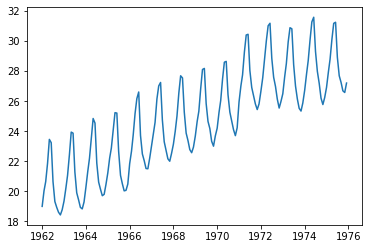

In [4]:
data['daily'] = data['milk'] / data.index.daysinmonth
data.head()
plt.plot(data.index, data.daily)
plt.show()

In [22]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(data.daily.values)[1]

0.6822151513081396

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:


milk.daily_diff1 = milk.daily - milk.daily.shift(1)


Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

milk.daily_diff12 = milk.daily - milk.daily.shift(12)


При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

Обычное дифференцирование (по дням)

In [19]:
data.daily_diff1 = (data.daily - data.daily.shift(1)).dropna()
print('pvalue', sm.tsa.stattools.adfuller(data.daily_diff1)[1])

pvalue 0.0643005465417464


Сезонное дифференцирование (по месяцам)

In [20]:
data.daily_diff2 = (data.daily - data.daily.shift(12)).dropna()
print('pvalue', sm.tsa.stattools.adfuller(data.daily_diff2)[1])

pvalue 0.22127672658830438


Последовательное дифференцирование (сезонное и обычное)

In [21]:
data.daily_diff3 = (data.daily_diff2 - data.daily_diff2.shift(1)).dropna()
print('pvalue', sm.tsa.stattools.adfuller(daily_diff3)[1])

pvalue 2.28084555180379e-06


**Ответ: ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного**

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?



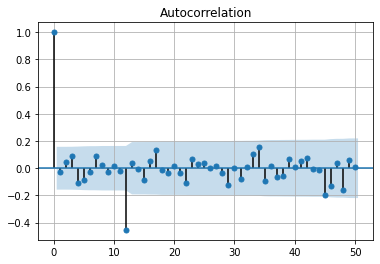

In [34]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data.daily_diff3.values.squeeze(), lags=50)
plt.grid()

**Ответ: Q = 1**

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. 
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?



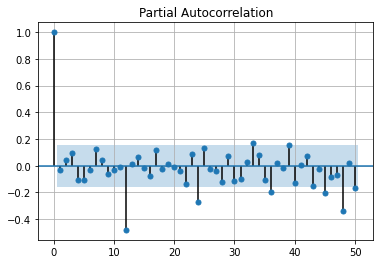

In [31]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data.daily_diff3.values.squeeze(), lags=50)
plt.grid()

Ответ: p = 0